<a href="https://colab.research.google.com/github/Madavi1234/python-programs/blob/main/IDS_ML_DL_Comprehensive_Model_Comparison(RUSHIR_BHAVSAR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/code/rushirbhavsar/ids-ml-dl-comprehensive-model-comparison
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Train_data.csv")
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
print("Training data has {} rows & {} columns".format(dataset.shape[0],dataset.shape[1]))

Training data has 25192 rows & 42 columns


In [5]:
X = dataset.drop("class", axis=1)
Y = dataset["class"]
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
X.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

X_object = X.select_dtypes("object")
X_int = X.select_dtypes(exclude = "object")

X_columns = X_int.columns

imputer.fit(X_int)
X_int = imputer.transform(X_int)
X_int = pd.DataFrame(X_int)
X_int.columns = X_columns

X_object = X_object.fillna("unknown")
X = X_object.join(X_int)

In [8]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = LE.fit_transform(Y)
Y = pd.Series(Y)
Y

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Length: 25192, dtype: int64

<ipython-input-9-4a7633f76d62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr().apply(abs))


<Axes: >

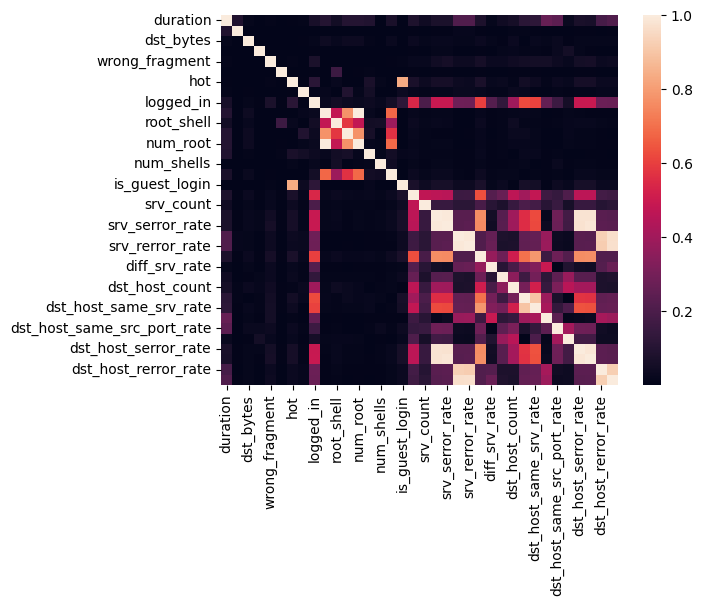

In [9]:
sns.heatmap(X.corr().apply(abs))

In [10]:
corr_with_target = X.corrwith(Y).apply(abs)
corr_with_target[corr_with_target>0.5]

<ipython-input-10-64ca896e2f8e>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_target = X.corrwith(Y).apply(abs)


logged_in                   0.688084
count                       0.578790
serror_rate                 0.649952
srv_serror_rate             0.647817
same_srv_rate               0.749237
dst_host_srv_count          0.719292
dst_host_same_srv_rate      0.692212
dst_host_serror_rate        0.651050
dst_host_srv_serror_rate    0.653759
dtype: float64

In [11]:
class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data):
        self.label_encoder = self.label_encoder.fit(list(data) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data):
        new_data = list(data)
        for unique_item in np.unique(data):
            if unique_item not in self.label_encoder.classes_:
                new_data = ['Unknown' if x==unique_item else x for x in new_data]
        return self.label_encoder.transform(new_data)

In [12]:
le = LabelEncoderExt()

# encode the selected columns
for col in X.select_dtypes("object"):
  le.fit(X[col])
  X[col] = le.transform(X[col])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# store the columns
cols = X_train.columns

# transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = cols)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

rfc.fit(X_train_scaled, y_train)

feature_imp = pd.DataFrame({'feature':X_train.columns,'importance':rfc.feature_importances_})
feature_imp = feature_imp.sort_values('importance',ascending=False).set_index('feature')


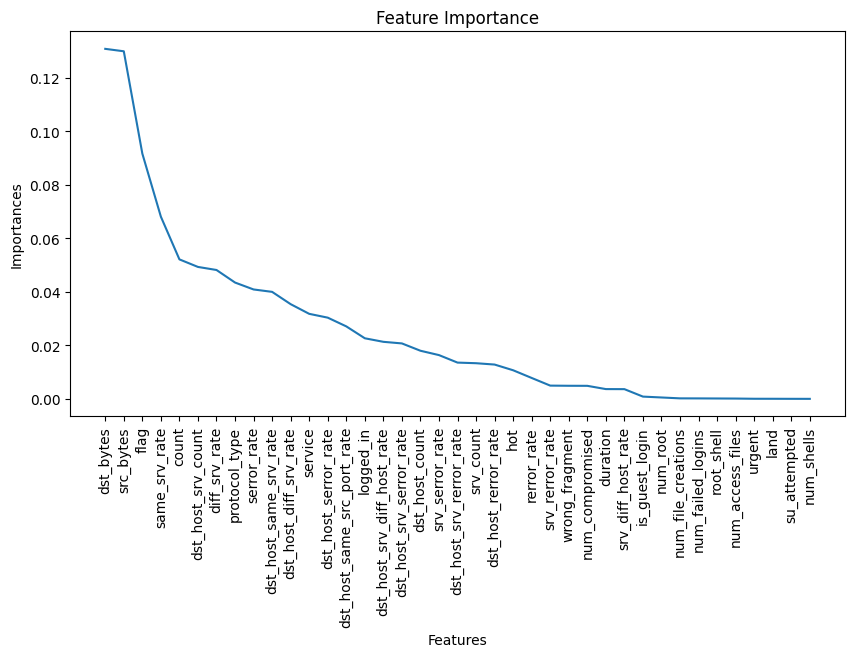

In [17]:
plt.figure(figsize = (10, 5))
plt.title("Feature Importance")
plt.ylabel("Importances")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.plot(feature_imp)

In [18]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
selector = RFE(estimator)
selector.fit(X_train_scaled, y_train)

X_train_scaled = selector.transform(X_train_scaled)
X_test_scaled = selector.transform(X_test_scaled)

In [19]:
from sklearn import datasets, metrics, tree, svm, neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# SVC MODEL
from sklearn.svm import SVC
svc = SVC(random_state = SEED)

# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()

# BERNOULLI NAIVE BAYES
bnb = BernoulliNB()

# Train RandomForestClassifier
rfe = RandomForestClassifier(max_depth=6)

# Train XGBOOST Classifier
from xgboost import XGBClassifier
xgbc = XGBClassifier(eval_metric="logloss", random_state=SEED)

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=SEED)

# Train Gradient-Boosting Classifier
grb = GradientBoostingClassifier(learning_rate=1.1)

In [28]:
from sklearn.model_selection import cross_val_score
models = {}
models['SVC']= svc
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc
models['Gaussian Naive Bayes Classifier']= gnb
models['Bernoulli Naive Bayes Classifier']= bnb
models['Gradient Boosting Classifier']= grb
models['Random Forest Classifier']= rfe
models['XGBoost Classifier']= xgbc
models['LightGBM Classifier']= lgbmc
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], X_train_scaled, y_train, cv=10, scoring=scorer)

[LightGBM] [Info] Number of positive: 8466, number of negative: 7404
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2152
[LightGBM] [Info] Number of data points in the train set: 15870, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533459 -> initscore=0.134038
[LightGBM] [Info] Start training from score 0.134038
[LightGBM] [Info] Number of positive: 8466, number of negative: 7404
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2112
[LightGBM] [Info] Number of data points in the train set: 15870, number of used features: 19
[LightGBM] [Info] [binar

In [29]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

************************ SVC Model Validation ************************
Mean precision: 
 99.09 % +- 0.32

Mean recall: 
 98.55 % +- 0.65

**************** LogisticRegression Model Validation ****************
Mean precision: 
 93.73 % +- 0.92

Mean recall: 
 94.92 % +- 0.75

************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 99.5 % +- 0.18

Mean recall: 
 99.52 % +- 0.23

********** Gaussian Naive Bayes Classifier Model Validation **********
Mean precision: 
 90.2 % +- 0.91

Mean recall: 
 93.15 % +- 1.13

********* Bernoulli Naive Bayes Classifier Model Validation *********
Mean precision: 
 86.34 % +- 0.9

Mean recall: 
 94.89 % +- 0.63

*********** Gradient Boosting Classifier Model Validation ***********
Mean precision: 
 99.35 % +- 0.41

Mean recall: 
 98.79 % +- 1.62

************* Random Forest Classifier Model Validation *************
Mean precision: 
 98.48 % +- 0.45

Mean recall: 
 99.73 % +- 0.2

**************** XGBoost Classifier Model V

<Axes: >

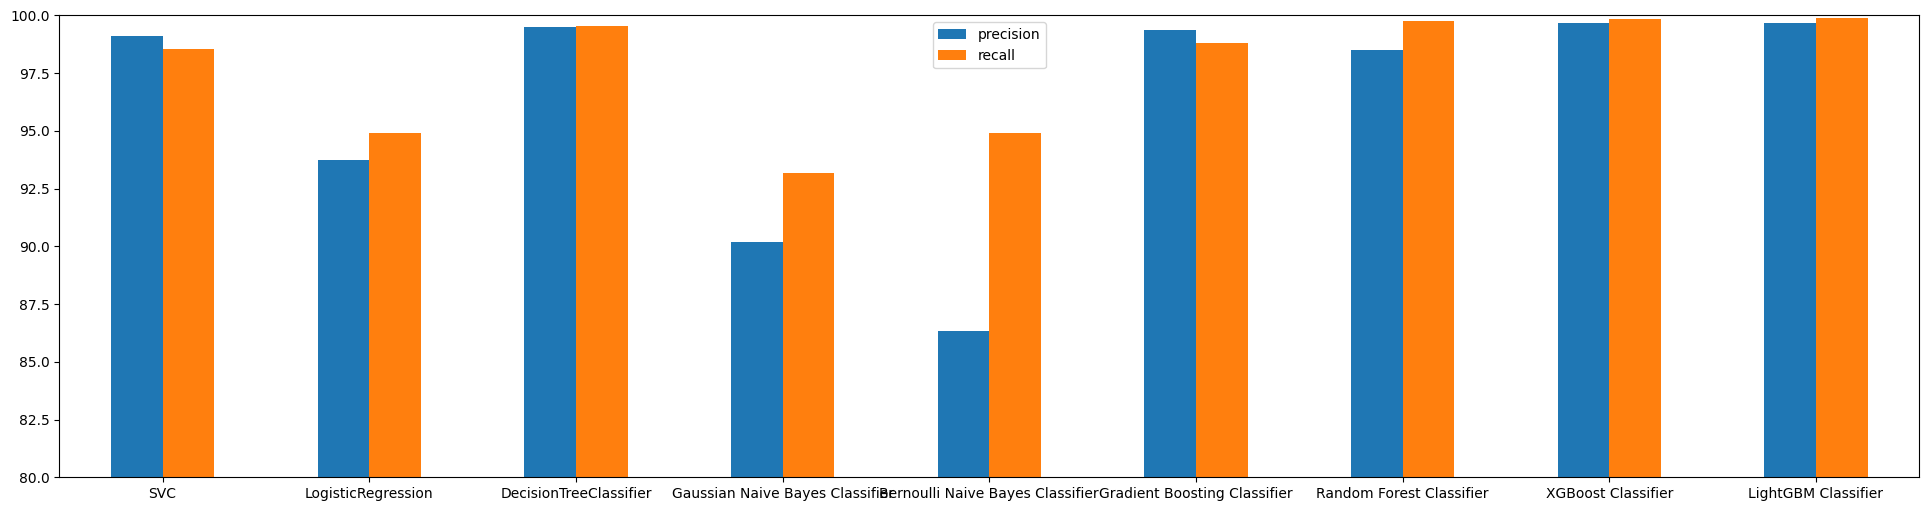

In [30]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [31]:
models = {}
models['SVC']= svc
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc
models['Gaussian Naive Bayes Classifier']= gnb
models['Bernoulli Naive Bayes Classifier']= bnb
models['Gradient Boosting Classifier']= grb
models['Random Forest Classifier']= rfe
models['XGBoost Classifier']= xgbc
models['LightGBM Classifier']= lgbmc
preds={}
for name in models:
    models[name].fit(X_train_scaled, y_train)
    preds[name] = models[name].predict(X_test_scaled)
print("Predictions complete.")

[LightGBM] [Info] Number of positive: 9407, number of negative: 8227
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2124
[LightGBM] [Info] Number of data points in the train set: 17634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533458 -> initscore=0.134033
[LightGBM] [Info] Start training from score 0.134033
Predictions complete.


In [32]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

************************ SVC Model Testing ************************
[[3493   23]
 [  67 3975]]
------------------------
              precision    recall  f1-score   support

      normal       0.98      0.99      0.99      3516
     anamoly       0.99      0.98      0.99      4042

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558

**************** LogisticRegression Model Testing ****************
[[3280  236]
 [ 198 3844]]
----------------
              precision    recall  f1-score   support

      normal       0.94      0.93      0.94      3516
     anamoly       0.94      0.95      0.95      4042

    accuracy                           0.94      7558
   macro avg       0.94      0.94      0.94      7558
weighted avg       0.94      0.94      0.94      7558

************** DecisionTreeClassifier Model Testing **************
[[3502   14]
 [  24 4018]]
--------------
      

<Axes: >

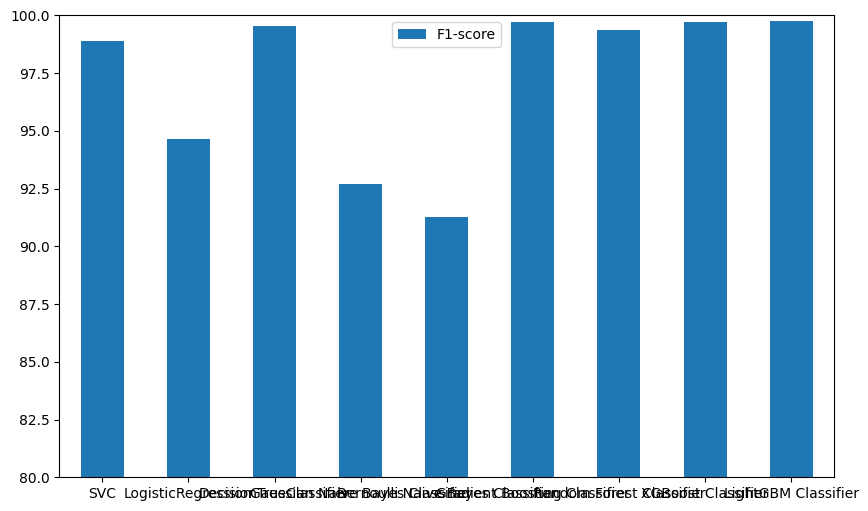

In [33]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)